<a href="https://colab.research.google.com/github/Mayconsmy/Sinais-e-Sistemas/blob/main/Segundo_Trabalho_Computacional.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Segundo Trabalho Computacional
### Disciplina: Sinais e Sistemas
### Discente:  Maycon Soares Maia
### Docente: Pedro Thiago Valerio de Souza

1. Considere um sistema de tempo LTI de tempo contınuo e causal com a seguinte funcao de transferencia:

$H(s) = \frac{2s + 3}{s^2 + 2s + 5}$

a) Utilizando calculo numerico, simule esse sistema de tempo contınuo quando a entrada e o degrau
unitario.

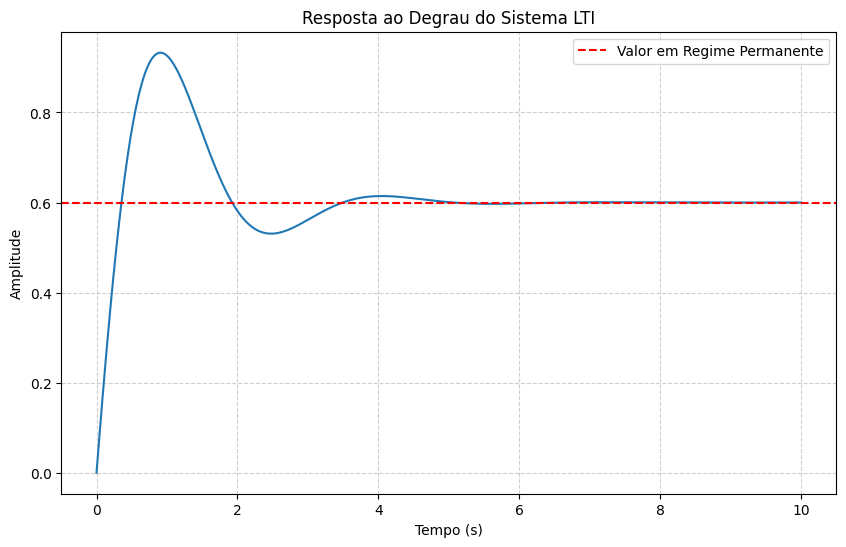

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import sympy as sym
from scipy.signal import butter, lfilter
from scipy.fft import fft, fftfreq

numerador = [2, 3]
denominador = [1, 2, 5]

#criando o sistema LTI
sistema_LTI = signal.lti(numerador, denominador)

t = np.linspace(0, 10, 500)

t_out, y_out = signal.step(sistema_LTI, T=t)

#plotando a resposta ao degrau
plt.figure(figsize=(10, 6))
plt.plot(t_out, y_out)
plt.title('Resposta ao Degrau (Sistema LTI)')

# calculo do valor em regime permanente quando a entrada é o degrau unitário
valor = 3/5
plt.axhline(y=valor, color='r', linestyle='--', label='Valor em Regime Permanente')

plt.title('Resposta ao Degrau do Sistema LTI')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()


b) Utilizando algum algoritmo de computador, apresente o diagrama de polos e zeros para esse sistema
e a partir desse, discuta a estabilidade do sistema.

Polos do sistema: [-1.+2.j -1.-2.j]
Zeros do sistema: [-1.5]
O sistema é estável.


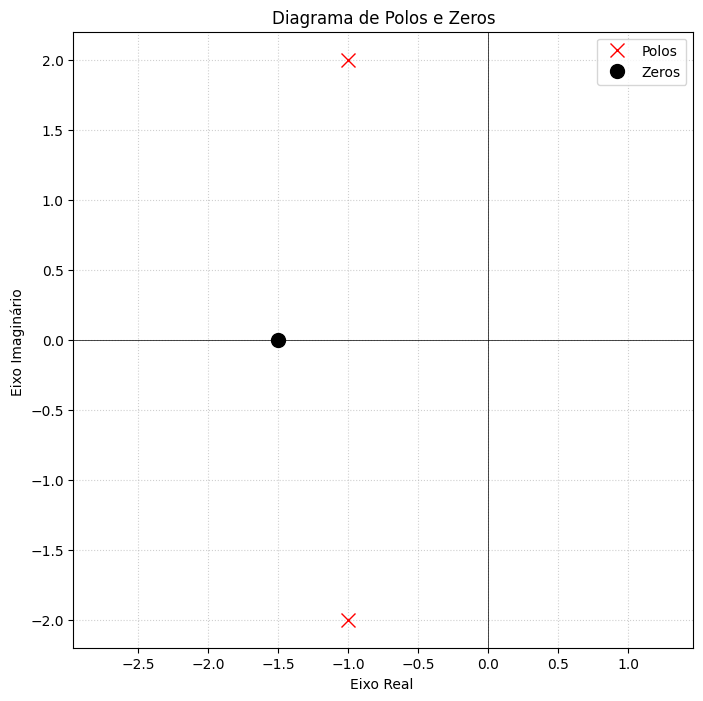

In [2]:
polos = sistema_LTI.poles
zeros = sistema_LTI.zeros

print("Polos do sistema:", polos)
print("Zeros do sistema:", zeros)

# Discutindo a estabilidade do sistema
is_stable = np.all(np.real(polos) < 0)

if is_stable:
    print("O sistema é estável.")
else:
    print("O sistema é instável.")

# plotando o diagrama de polos e zeros
plt.figure(figsize=(8, 8))
plt.plot(polos.real, polos.imag, 'x', markersize=10, label='Polos', color='red')
plt.plot(zeros.real, zeros.imag, 'o', markersize=10, label='Zeros', color='black')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True, linestyle=':', alpha=0.6)
plt.title('Diagrama de Polos e Zeros')
plt.xlabel('Eixo Real ')
plt.ylabel('Eixo Imaginário ')
plt.legend()
plt.axis('equal')
plt.show()

Com base no texto do pdf resolva os problemas 2 e 3:

2. Dado um sistema de segunda ordem causal cuja funcao de transferencia dada por:

$H(s) = \frac{16}{s^2 + 4s + 16}$

a) Calcule os valores de $ 𝜔_𝑛 $ e 𝜁 e verifique que o sistema e subamortecido

In [3]:
#definindo o sistema
numerador = [16]
denominador = [1, 4, 16]

w = np.sqrt(denominador[2])
zet = denominador[1]/(2*w)

print(f"frequencia natural {w:.2f} rad/s")
print(f"fator de amortecimento {zet:.2f}")

if zet < 1:
    print("sistema subamortecido")
else:
    print("sistema não é subamortecido")

frequencia natural 4.00 rad/s
fator de amortecimento 0.50
sistema subamortecido


b) Utilizando algum algoritmo de computador, apresente o diagrama de polos e zeros para esse sistema
e a partir desse, discuta a estabilidade do sistema.

Polos: [-2.+3.46410162j -2.-3.46410162j]
Zeros: []
Ganho: 16.0


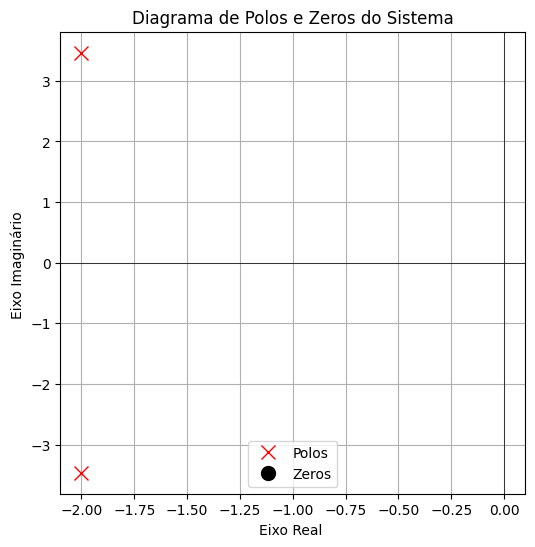

Sistema Subamortecido
O sistema é estável pois todos os polos possuem parte real negativa.


In [11]:
zeros, polos, ganho = signal.tf2zpk(numerador, denominador)

print("Polos:", polos)
print("Zeros:", zeros)
print("Ganho:", ganho)

#grafico
plt.figure(figsize=(6, 6))
plt.plot(polos.real, polos.imag, 'x', markersize=10, label='Polos', color='red')
plt.plot(zeros.real, zeros.imag, 'o', markersize=10, label='Zeros', color='black')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title('Diagrama de Polos e Zeros do Sistema')
plt.xlabel('Eixo Real ')
plt.ylabel('Eixo Imaginário ')
plt.grid(True)
plt.legend()
plt.show()

if 0 < zet < 1:
    print("Sistema Subamortecido")
else:
    print("Não é subamortecido")

#estabilidade
estavel = np.all(np.real(polos) < 0)
if estavel:
    print("O sistema é estável pois todos os polos possuem parte real negativa.")
else:
    print("O sistema é instável.")

c) Calcule os valores do tempo de subida, tempo de pico, sobressinal e o tempo de acomodacao para esse sistema.


In [5]:
w = w * np.sqrt(1 - zet**2)

#tempo de subida
tr = (np.pi - np.arccos(zet)) / w

#tempo de pico
tp = np.pi / w

#sobressinal
mp = 100 * np.exp((-zet * np.pi) / np.sqrt(1 - zet**2))

#tempo de acomodação
ts = 3 / (zet * w)

print(f"Tempo de subida: {tr:.2f} s")
print(f"Tempo de pico: {tp:.2f} s")
print(f"Sobressinal: {mp:.2f} %")
print(f"Tempo de acomodação: {ts:.2f} s")

Tempo de subida: 0.60 s
Tempo de pico: 0.91 s
Sobressinal: 16.30 %
Tempo de acomodação: 1.73 s


d) Simule a saıda do sistema quando a entrada e o degrau. Verifique graficamente os valores de tempo
de subida, tempo de pico, sobressinal e o tempo de acomodacao.

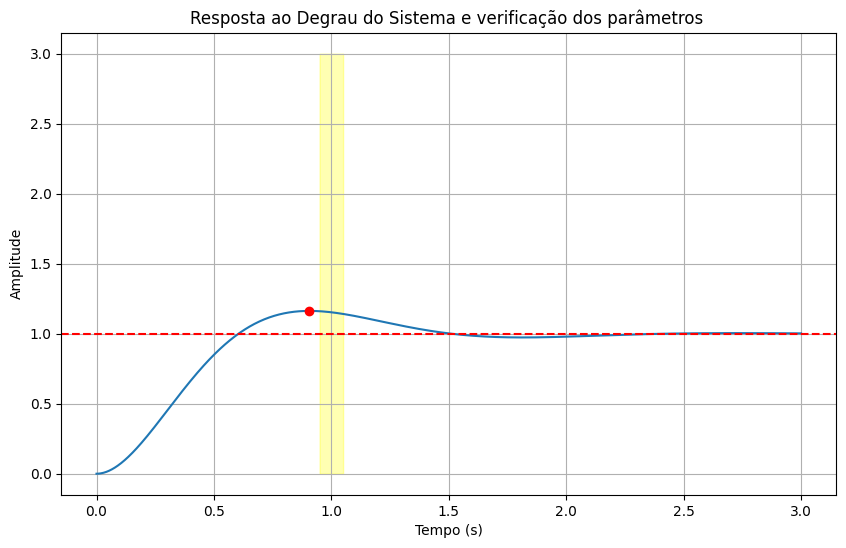

In [6]:
#resposta ao degrau
t = np.linspace(0, 3, 1000)
t, y = signal.step((numerador, denominador), T=t)

#grafico
plt.figure(figsize=(10, 6))
plt.plot(t, y)
plt.title('Resposta ao Degrau do Sistema')
plt.axhline(y=1, color='r', linestyle='--', label='Regime Permanente')
v_pico = 1 + (mp / 100)
plt.plot(tp, v_pico, 'ro', label='Pico Máximo')
plt.axhline(ts, v_pico, color='g', linestyle='--', label='Tempo de Acomodação')
plt.fill_betweenx(t, 0.95, 1.05, color='yellow', alpha=0.3, label='Banda de 5%')

plt.title('Resposta ao Degrau do Sistema e verificação dos parâmetros ')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

3. Considere o sistema de controle apresentado na Figura 2. Supondo que deseja-se que o sistema em malha
fechada possua um sobressinal maximo de 20% e um tempo de subida de 0,3s.

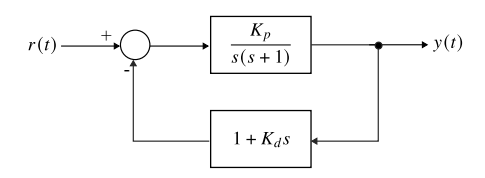

a) Determine os valores de $𝐾_𝑝$ e $𝐾_𝑑 $ que atendem essas condicoes.



### 1. Modelagem do Sistema em Malha Fechada
A partir do diagrama de blocos fornecido (Figura 2), a Função de Transferência de Malha Fechada $T(s)$ é obtida por:

$$T(s) = \frac{G(s)}{1 + G(s)H(s)}$$

Onde $G(s) = \frac{K_p}{s(s+1)}$ e $H(s) = 1 + K_d s$. Substituindo e simplificando:

$$T(s) = \frac{K_p}{s^2 + (1 + K_p K_d)s + K_p}$$

Comparando com a forma canônica de segunda ordem $s^2 + 2\zeta\omega_n s + \omega_n^2$, obtemos as relações:
1.  $\omega_n^2 = K_p$
2.  $2\zeta\omega_n = 1 + K_p K_d$

### 2. Cálculo do Fator de Amortecimento ($\zeta$)
Utilizando a fórmula do sobressinal máximo fornecida:

$$M_p = 100exp({\frac{-\zeta\pi}{\sqrt{1-\zeta^2}}})$$

Para $M_p = 0,2$ (20\%), isolamos $\zeta$:

$$\zeta = \frac{|\ln(0,2)|}{\sqrt{\pi^2 + \ln^2(0,2)}} \approx \mathbf{0,456}$$

### 3. Cálculo da Frequência Natural ($\omega_n$)
Utilizando a fórmula do tempo de subida fornecida:

$$t_r = \frac{\pi - \arccos(\zeta)}{\omega_n\sqrt{1-\zeta^2}}$$

Para $t_r = 0,3$ s e $\zeta = 0,456$:

$$\omega_n = \frac{\pi - 1,107}{0,3 \sqrt{1 - 0,456^2}} \approx \mathbf{7,65 \text{ rad/s}}$$

### 4. Determinação dos Ganhos ($K_p$ e $K_d$)
Com $\zeta$ e $\omega_n$ determinados, voltamos às relações do sistema:

* **Ganho Proporcional ($K_p$):**
    $$K_p = \omega_n^2 = (7,65)^2 \approx \mathbf{58,52}$$

* **Ganho Derivativo ($K_d$):**
    $$2\zeta\omega_n = 1 + K_p K_d$$
    $$2(0,456)(7,65) = 1 + 58,52 K_d$$
    $$K_d = \frac{6,977 - 1}{58,52} \approx \mathbf{0,102}$$


b) Considerando os valores de $𝐾_𝑝$ e $𝐾_𝑑$ calculados no item anterior, determine os valores do tempo de
subida e o tempo de acomodacao do sistema em malha fechada.


### 1. Parâmetros Obtidos no Item (a)
* Fator de amortecimento: **$\zeta \approx 0,456$**
* Frequência natural: **$\omega_n \approx 7,65$ rad/s**

### 2. Cálculo do Tempo de Subida ($t_r$)

$$t_r = \frac{\pi - \arccos(\zeta)}{\omega_d}$$

Onde a frequência natural amortecida $\omega_d$ é:
$$\omega_d = \omega_n \sqrt{1-\zeta^2} = 7,65 \sqrt{1 - 0,456^2} \approx 6,81 \text{ rad/s}$$

Substituindo os valores:
$$t_r = \frac{3,1416 - 1,107}{6,81} \approx \frac{2,034}{6,81} \approx \mathbf{0,3 \text{ s}}$$


### 3. Cálculo do Tempo de Acomodação ($t_s$)
[cite_start]O enunciado define o tempo de acomodação para uma faixa de erro de $\pm 5\%$ através da fórmula[cite: 28]:

$$t_s = \frac{3}{\zeta\omega_n}$$

O termo $\zeta\omega_n$ é:
$$\sigma = \zeta\omega_n = 0,456 \times 7,65 \approx 3,488$$

Logo:
$$t_s = \frac{3}{3,488} \approx \mathbf{0,86 \text{ s}}$$

c) Simule o sistema de controle em malha fechada considerando que a referencia  e o degrau unitario.
Verifique graficamente os valores de tempo de subida, tempo de pico, sobressinal e o tempo de
acomodacao.

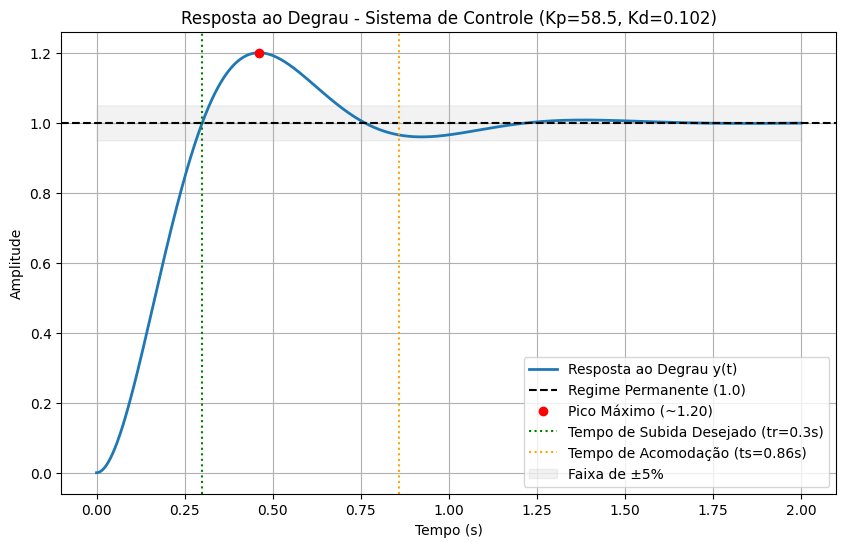

--- Resultados da Simulação ---
Pico Máximo atingido: 1.2004
Valor esperado (M_p 20%): 1.2000


In [53]:

# --- Parâmetros Calculados (Item a) ---
Kp = 58.52
Kd = 0.102
zeta = 0.456
wn = 7.65

# --- Definição da Função de Transferência em Malha Fechada ---
num = [Kp]
den = [1, (1 + Kp * Kd), Kp]

sistema = lti(num, den)

# --- Simulação ---
t_sim = np.linspace(0, 2, 1000) # Simular 2 segundos
t, y = step(sistema, T=t_sim)

# --- Cálculo dos Indicadores Teóricos para Plotagem ---
# Tempo de Pico (tp)
wd = wn * np.sqrt(1 - zeta**2)
tp_teorico = np.pi / wd
pico_teorico = 1 + np.exp(-zeta * np.pi / np.sqrt(1 - zeta**2)) # 1.20

# Tempo de Acomodação (ts) - Critério 5%
ts_teorico = 3 / (zeta * wn)

# --- Plotagem ---
plt.figure(figsize=(10, 6))
plt.plot(t, y, label='Resposta ao Degrau y(t)', linewidth=2)
plt.axhline(1.0, color='black', linestyle='--', label='Regime Permanente (1.0)')

# Marcação dos pontos de interesse
plt.plot(tp_teorico, pico_teorico, 'ro', label=f'Pico Máximo (~{pico_teorico:.2f})')
plt.axvline(0.3, color='green', linestyle=':', label='Tempo de Subida Desejado (tr=0.3s)')
plt.axvline(ts_teorico, color='orange', linestyle=':', label=f'Tempo de Acomodação (ts={ts_teorico:.2f}s)')

# Faixa de 5%
plt.fill_between(t, 0.95, 1.05, color='gray', alpha=0.1, label='Faixa de ±5%')

plt.title(f'Resposta ao Degrau - Sistema de Controle (Kp={Kp:.1f}, Kd={Kd:.3f})')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.legend()
plt.show()

print(f"Pico Máximo atingido: {max(y):.4f}")
print(f"Valor esperado (M_p 20%): 1.2000")

4. Considere um sistema linear e invariante no tempo estavel descrito pela seguinte equacao diferencial:


$\frac{d^2y(t)}{dt^2} + 5\frac{dy(t)}{dt} + 6y(t) = -\frac{dx(t)}{dt}$


a) Utilizando alguma linguagem de programacao, plote o grafico da resposta em magnitude e resposta
em fase para esse sistema

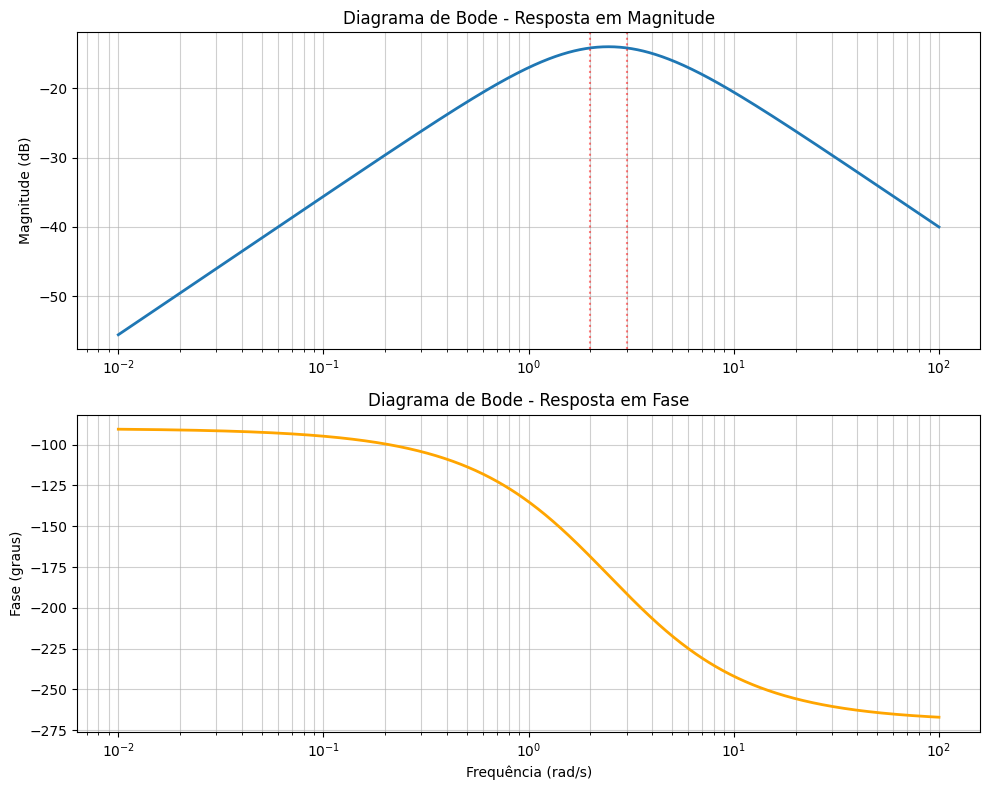

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


num = [-1, 0]
den = [1, 5, 6]

# Criar o objeto de sistema linear
sistema = signal.TransferFunction(num, den)

# --- Item A: Cálculo da Resposta em Frequência ---
w = np.logspace(-2, 2, 1000)
w, mag, phase = signal.bode(sistema, w)

# --- Plotagem dos Gráficos ---
plt.figure(figsize=(10, 8))

# Gráfico de Magnitude
plt.subplot(2, 1, 1)
plt.semilogx(w, mag, linewidth=2)
plt.title('Resposta em Magnitude')
plt.ylabel('Magnitude (dB)')
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.axvline(2, color='r', linestyle=':', alpha=0.5) # Polo em -2
plt.axvline(3, color='r', linestyle=':', alpha=0.5) # Polo em -3

# Gráfico de Fase
plt.subplot(2, 1, 2)
plt.semilogx(w, phase, linewidth=2, color='orange')
plt.title('Resposta em Fase')
plt.xlabel('Frequência (rad/s)')
plt.ylabel('Fase (graus)')
plt.grid(True, which="both", ls="-", alpha=0.6)

plt.tight_layout()
plt.show()

b) Analisando o resultado obtido no item (b), classifique o sistema em (i) passa-baixas, (ii) passa-altas,
(iii) rejeita-faixas ou (iv) passa-faixas.


In [12]:
#definindo frequencias para teste
freq_baixa = 0.01
freq_media = np.sqrt(2*3)
freq_alta = 1000

mag_teste = [freq_baixa, freq_media, freq_alta]
out, mag, fase = signal.bode(sistema, mag_teste)

print('b) Analisando o resultado obtido e classificando o sistema em (i) passa-baixas, (ii) passa-altas,(iii) rejeita-faixas ou (iv) passa-faixas.')

if mag[0] > mag[1] and mag[1] > mag[2]:
    print("O sistema é passa-baixas.")
elif mag[0] < mag[1] and mag[1] < mag[2]:
    print("O sistema é passa-altas.")
elif mag[0] < mag[1] and mag[1] > mag[2]:
    print("O sistema é rejeita-faixas.")
else:
    print("O sistema é passa-faixas.")


b) Analisando o resultado obtido e classificando o sistema em (i) passa-baixas, (ii) passa-altas,(iii) rejeita-faixas ou (iv) passa-faixas.
O sistema é rejeita-faixas.


5. A modulacao em amplitude convencional consiste em gerar um sinal modulado 𝜑𝐴𝑀(𝑡) tal que:


$\varphi_{AM}(t) = [K + m(t)] \cos(2\pi f_c t)$

sendo 𝑚(𝑡) o sinal modulante, $𝑓_𝑐$ a frequencia da portadora e $𝐾$ uma constante.


a) Admitindo que o sinal $𝑥(𝑡) = 𝑚(𝑡) + cos(2𝜋 𝑓_𝑐𝑡)$ e aplicado em um elemento nao-linear cuja saıda dada por:

$ y(t)= x(t) + \frac{1}{2}x^2(t)$


Determine a expressao que relaciona o espectro de $𝑦(𝑡)$ com o espectro de $𝑚(𝑡)$.

$$y(t) = {m(t) + \frac{1}{2}m^2(t) + \frac{1}{4}}{} + {[1 + m(t)]\cos(2\pi f_c t)} + {\frac{1}{4}\cos(4\pi f_c t)}$$

b) Demonstre que um sinal AM pode ser gerado filtrando-se o sinal $𝑦(𝑡)$ em um filtro passa-faixas.
Determine a frequencia central desse filtro, bem como sua largura de banda.

In [50]:

    print("RESOLUÇÃO DA QUESTÃO 5 - ITEM B (Filtro)")


    print("\n Seleção do Sinal AM")
    print("O espectro Y(f) possui componentes em:")
    print(" - 0 Hz (Banda Base)")
    print(" - fc (Sinal AM desejado)")
    print(" - 2fc (Distorção)")
    print("Para recuperar o AM, usamos um filtro Passa-Faixas centrado em fc.")

    print("\n[CÁLCULO DOS PARÂMETROS]")
    print("Dados: fm = 1 kHz, fc = 10 kHz")
    print("1. Frequência Central: fc = 10 kHz")
    print("2. Largura de Banda (BW):")
    print("   Deve cobrir as bandas laterais (fc - fm) até (fc + fm).")
    print("   BW_min = 2 * fm = 2 kHz.")
    print("   Faixa de Passagem Sugerida: 9 kHz a 11 kHz.")

# Executar a função

RESOLUÇÃO DA QUESTÃO 5 - ITEM B (Filtro)

 Seleção do Sinal AM
O espectro Y(f) possui componentes em:
 - 0 Hz (Banda Base)
 - fc (Sinal AM desejado)
 - 2fc (Distorção)
Para recuperar o AM, usamos um filtro Passa-Faixas centrado em fc.

[CÁLCULO DOS PARÂMETROS]
Dados: fm = 1 kHz, fc = 10 kHz
1. Frequência Central: fc = 10 kHz
2. Largura de Banda (BW):
   Deve cobrir as bandas laterais (fc - fm) até (fc + fm).
   BW_min = 2 * fm = 2 kHz.
   Faixa de Passagem Sugerida: 9 kHz a 11 kHz.


c) Utilizando alguma linguagem de programacao, implemente o modulador AM proposto. Apresente
os seguintes graficos:

i. Sinal de mensagem e sinal de portadora;

ii. Espectro do sinal de mensagem e do sinal de portadora;


iii. Sinal de sa´ıda do elemento nao-linear; ˜


iv. Espectro de sa´ıda do sinal de sa´ıda do elemento nao-linear; ˜


v. Sinal de sa´ıda do filtro passa-faixas;


vi. Espectro de sa´ıda do sinal de sa´ıda do filtro passa-faixas.


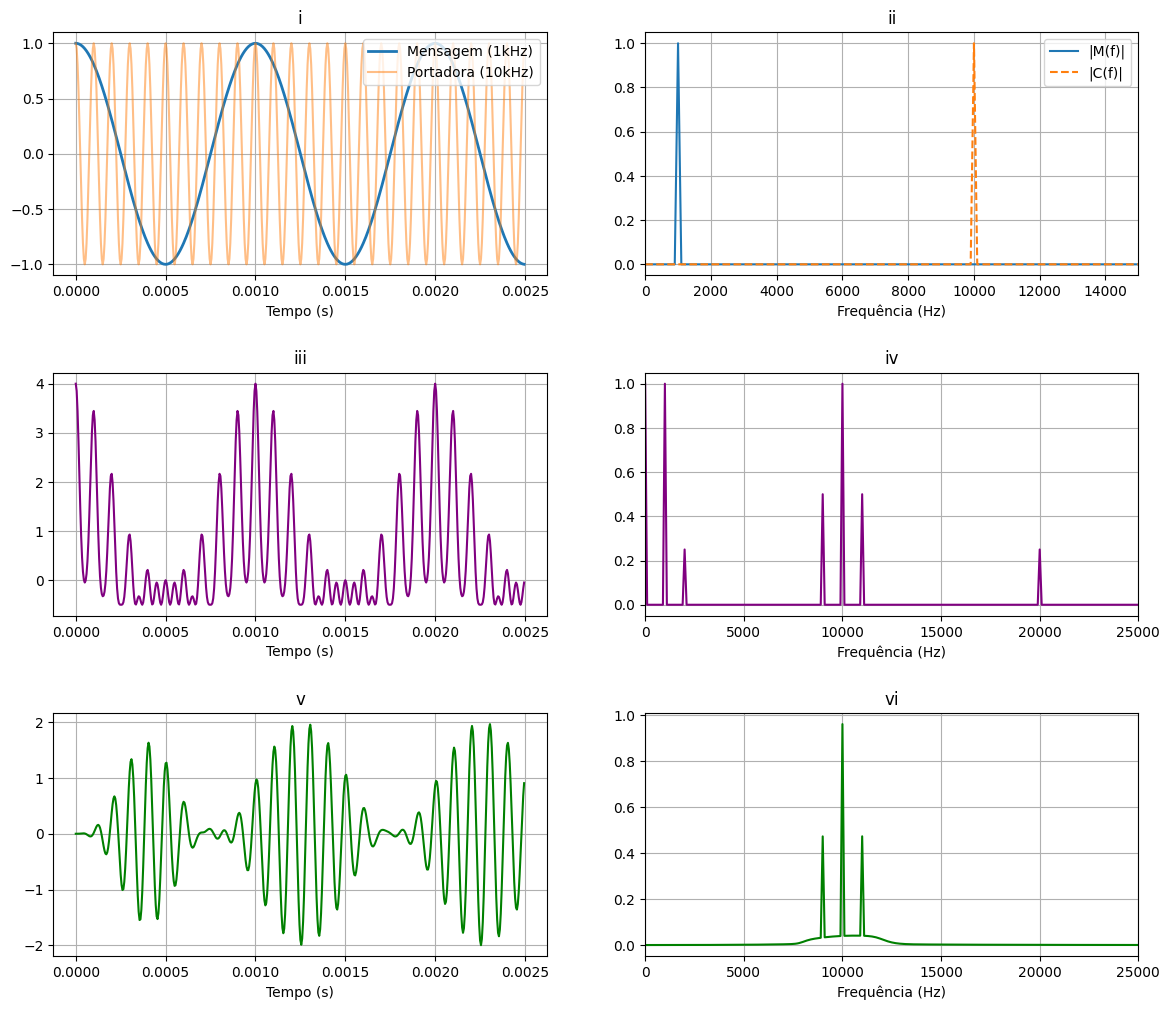

In [28]:

#Parametros do sistema
fm = 1000        # Frequência da mensagem (1 kHz)
fc = 10000       # Frequência da portadora (10 kHz)
fs = 200000      # Frequência de amostragem (200 kHz - alta para ver harmônicas)
duration = 0.01  # Duração da simulação (10 ms - suficiente para ver ciclos de fm)

#vetor de tempo
t = np.linspace(0, duration, int(fs * duration), endpoint=False)


m_t = np.cos(2 * np.pi * fm * t)

# Portadora
c_t = np.cos(2 * np.pi * fc * t)

# Sinal de entrada
x_t = m_t + c_t


y_t = x_t + 0.5 * (x_t**2)

lowcut = 8000
highcut = 12000
order = 5

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

z_t = butter_bandpass_filter(y_t, lowcut, highcut, fs, order)

def calcular_fft(sinal, fs):
    N = len(sinal)
    yf = fft(sinal)
    xf = fftfreq(N, 1 / fs)
    # Retorna apenas a metade positiva do espectro
    return xf[:N//2], 2.0/N * np.abs(yf[0:N//2])

freqs, M_f = calcular_fft(m_t, fs)
_, C_f = calcular_fft(c_t, fs)
_, Y_f = calcular_fft(y_t, fs)
_, Z_f = calcular_fft(z_t, fs)


#Graficos
fig, axs = plt.subplots(3, 2, figsize=(14, 12))
plt.subplots_adjust(hspace=0.4)

# i. Sinal de mensagem e sinal de portadora;
axs[0, 0].plot(t[:500], m_t[:500], label='Mensagem (1kHz)', linewidth=2)
axs[0, 0].plot(t[:500], c_t[:500], label='Portadora (10kHz)', alpha=0.5)
axs[0, 0].set_title('i')
axs[0, 0].set_xlabel('Tempo (s)')
axs[0, 0].legend(loc='upper right')
axs[0, 0].grid(True)

# ii. Espectro do sinal de mensagem e do sinal de portadora;
axs[0, 1].plot(freqs, M_f, label='|M(f)|')
axs[0, 1].plot(freqs, C_f, label='|C(f)|', linestyle='--')
axs[0, 1].set_title('ii')
axs[0, 1].set_xlabel('Frequência (Hz)')
axs[0, 1].set_xlim(0, 15000)
axs[0, 1].legend()
axs[0, 1].grid(True)

# iii. Sinal de sa´ıda do elemento nao-linear;
axs[1, 0].plot(t[:500], y_t[:500], color='purple')
axs[1, 0].set_title('iii')
axs[1, 0].set_xlabel('Tempo (s)')
axs[1, 0].grid(True)

# iv. Espectro de saıda do sinal de saıda do elemento nao-linear;
axs[1, 1].plot(freqs, Y_f, color='purple')
axs[1, 1].set_title('iv')
axs[1, 1].set_xlabel('Frequência (Hz)')
axs[1, 1].set_xlim(0, 25000)
axs[1, 1].grid(True)

# v. Sinal de saıda do filtro passa-faixas;
axs[2, 0].plot(t[:500], z_t[:500], color='green')
axs[2, 0].set_title('v')
axs[2, 0].set_xlabel('Tempo (s)')
axs[2, 0].grid(True)

# vi. Espectro de sa´ıda do sinal de sa´ıda do filtro passa-faixas.
axs[2, 1].plot(freqs, Z_f, color='green')
axs[2, 1].set_title('vi')
axs[2, 1].set_xlabel('Frequência (Hz)')
axs[2, 1].set_xlim(0, 25000)
axs[2, 1].grid(True)

plt.show()

6. Considere que deseja-se multiplexar em frequencia tres sinais 𝑥1(𝑡), 𝑥2(𝑡) e 𝑥3(𝑡), definidos como:

$x_1(t) = cos(20\pi t)$

$x_2(t) = cos(50\pi t)$

$x_3(t) = cos(80\pi t)$

Para isso, cada sinal e modulado AM-DSB-SC com frequencias de sub-portadoras de $𝑓_𝑐1 = 1100 Hz$,
$𝑓_𝑐2 = 2200 Hz$ e $𝑓𝑐3 = 3300 Hz$, respectivamente. O sinal multiplexado entao e transmitido em um
esquema AM-DSB-SC utilizando uma frequencia de portadora de  $𝑓_𝑐 = 25kHz$.

a) Proponha um esquema para o transmissor e o receptor para essa multiplexacao por divisao em frequencia. Deve ser possıvel transmitir todos os sinais em um mesmo canal de comunicacoes e no receptor, deve-se ser capaz de recuperar cada sinal individualmente.

b) Utilizando um algoritmo de computador, simule o sistema proposto. Apresente como resultados:

i. Forma de onda e espectro para os sinais $𝑥_1(𝑡), 𝑥_2(𝑡) e 𝑥_3(𝑡)$.

ii. Espectro dos sinais $𝑥1 (𝑡), 𝑥2 (𝑡) e 𝑥3 (𝑡)$ apos a modulacao com as sub-portadoras;


iii. Espectro do sinal multiplexado em frequencia;  
iv. Forma de onda e espectro dos sinais apos a recepcao.

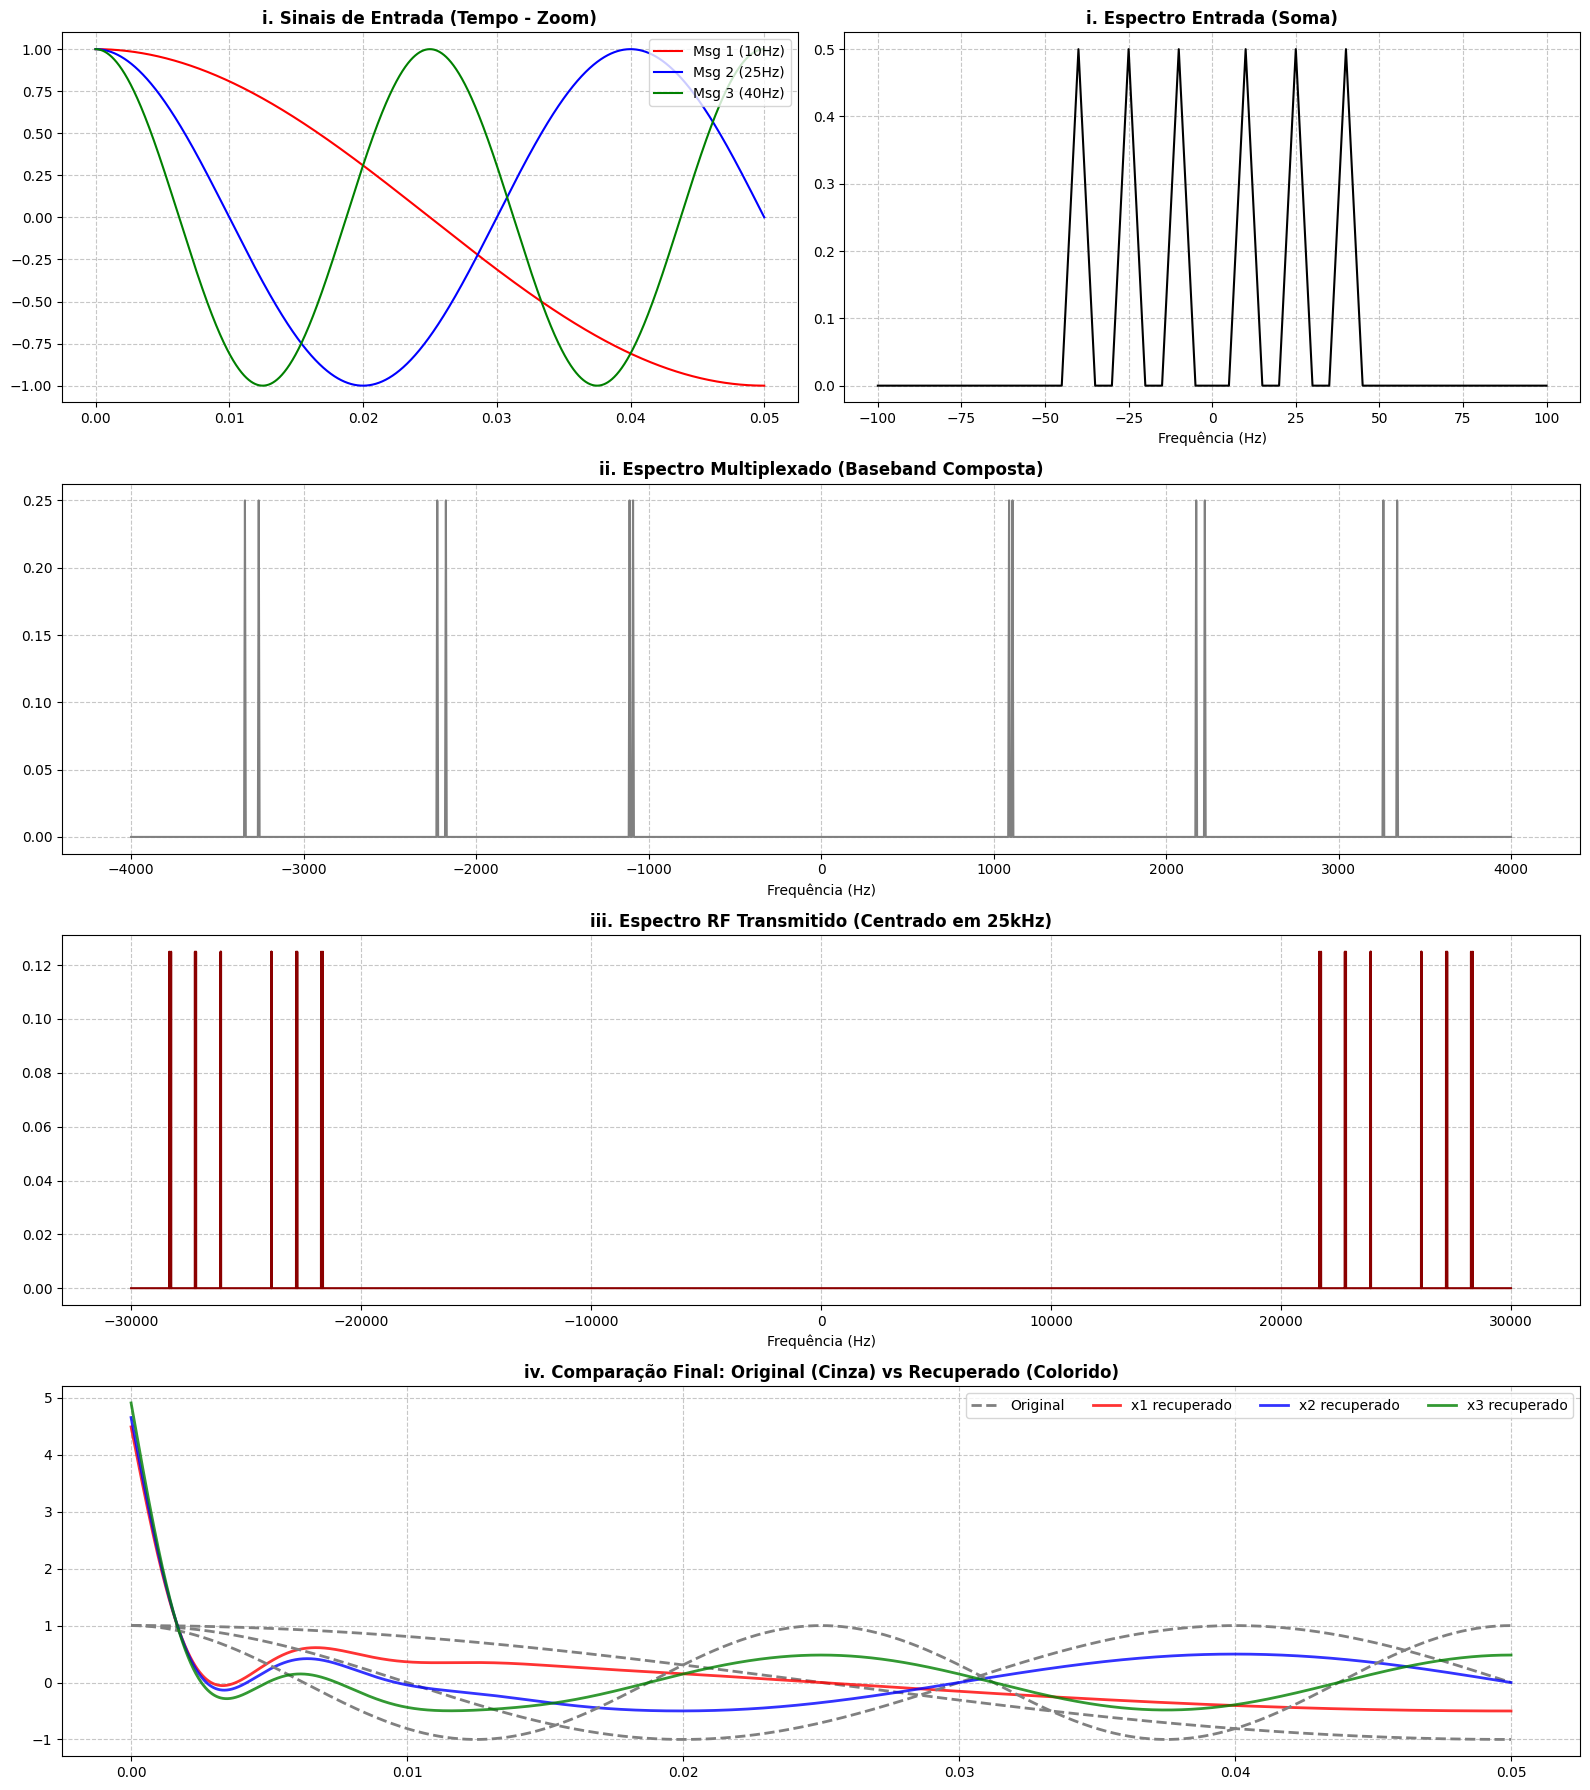

In [48]:

freq_amostragem = 400000  # fs
duracao_s = 0.2           # duration
tempo = np.arange(0, duracao_s, 1/freq_amostragem)

# Frequências dos sinais de mensagem (Entrada)
freq_msg1 = 10
freq_msg2 = 25
freq_msg3 = 40

# Frequências das Sub-portadoras
freq_sub1 = 1100
freq_sub2 = 2200
freq_sub3 = 3300

# Frequência da Portadora Principal (RF)
freq_portadora_rf = 25000


# Geração dos Sinais de Mensagem
msg1 = np.cos(2 * np.pi * freq_msg1 * tempo)
msg2 = np.cos(2 * np.pi * freq_msg2 * tempo)
msg3 = np.cos(2 * np.pi * freq_msg3 * tempo)

# Modulação Individual (AM-DSB-SC com Sub-portadoras)
sinal_mod_sub1 = msg1 * np.cos(2 * np.pi * freq_sub1 * tempo)
sinal_mod_sub2 = msg2 * np.cos(2 * np.pi * freq_sub2 * tempo)
sinal_mod_sub3 = msg3 * np.cos(2 * np.pi * freq_sub3 * tempo)

# Multiplexação (Soma dos sinais modulados)
sinal_multiplexado = sinal_mod_sub1 + sinal_mod_sub2 + sinal_mod_sub3

# Modulação Final (RF - 25kHz)
sinal_rf_transmitido = sinal_multiplexado * np.cos(2 * np.pi * freq_portadora_rf * tempo)

nyquist = 0.5 * freq_amostragem

# --- Estágio 1: Recuperação do Sinal Multiplexado ---
sinal_demod_rf_bruto = sinal_rf_transmitido * np.cos(2 * np.pi * freq_portadora_rf * tempo)

# Filtro Passa-Baixas (Corte em 5000 Hz) para remover a cópia de alta frequência (50kHz)
b_rf, a_rf = signal.butter(4, 5000/nyquist, btype='low')
sinal_mux_recuperado = signal.filtfilt(b_rf, a_rf, sinal_demod_rf_bruto)

# --- Estágio 2: Separação e Recuperação das Mensagens ---
# Filtro Passa-Baixas Final (Corte em 150 Hz) para isolar a mensagem base
b_msg, a_msg = signal.butter(4, 150/nyquist, btype='low')

# Canal 1
rec1_misturado = sinal_mux_recuperado * np.cos(2 * np.pi * freq_sub1 * tempo)
msg1_recuperada = 2 * signal.filtfilt(b_msg, a_msg, rec1_misturado) # *2 para corrigir amplitude

# Canal 2
rec2_misturado = sinal_mux_recuperado * np.cos(2 * np.pi * freq_sub2 * tempo)
msg2_recuperada = 2 * signal.filtfilt(b_msg, a_msg, rec2_misturado)

# Canal 3
rec3_misturado = sinal_mux_recuperado * np.cos(2 * np.pi * freq_sub3 * tempo)
msg3_recuperada = 2 * signal.filtfilt(b_msg, a_msg, rec3_misturado)


def plotar_espectro(sinal, fs, eixo, titulo, limite_eixo=None, cor='blue'):
    """Função auxiliar para plotar FFT com estilo personalizado"""
    N = len(sinal)
    Y = fft.fft(sinal)
    Y = fft.fftshift(Y)
    freqs = fft.fftfreq(N, 1/fs)
    freqs = fft.fftshift(freqs)
    magnitude = np.abs(Y) / N

    if limite_eixo:
        mascara = (freqs >= -limite_eixo) & (freqs <= limite_eixo)
        eixo.plot(freqs[mascara], magnitude[mascara], color=cor, linewidth=1.5)
    else:
        eixo.plot(freqs, magnitude, color=cor, linewidth=1.5)

    eixo.set_title(titulo, fontsize=12, fontweight='bold')
    eixo.set_xlabel("Frequência (Hz)")
    eixo.grid(True, linestyle='--', alpha=0.7)

# Configuração da Figura (Tamanho alterado)
plt.figure(figsize=(16, 18))
plt.subplots_adjust(hspace=0.4)
zoom_tempo = slice(0, 20000)


# 1. Sinais de Entrada (Tempo)
plt.subplot(4, 2, 1)
plt.plot(tempo[zoom_tempo], msg1[zoom_tempo], label='Msg 1 (10Hz)', color='red', linewidth=1.5)
plt.plot(tempo[zoom_tempo], msg2[zoom_tempo], label='Msg 2 (25Hz)', color='blue', linewidth=1.5)
plt.plot(tempo[zoom_tempo], msg3[zoom_tempo], label='Msg 3 (40Hz)', color='green', linewidth=1.5)
plt.title("i. Sinais de Entrada (Tempo - Zoom)", fontsize=12, fontweight='bold')
plt.legend(loc='upper right', fontsize='medium')
plt.grid(True, linestyle='--', alpha=0.7)

# 2. Espectro da Soma das Entradas
eixo_spec_in = plt.subplot(4, 2, 2)
# Plota o espectro combinado apenas para ilustração
plotar_espectro(msg1+msg2+msg3, freq_amostragem, eixo_spec_in, "i. Espectro Entrada (Soma)", limite_eixo=100, cor='black')

# 3. Espectro após Sub-portadoras (Mux)
eixo_mux = plt.subplot(4, 1, 2)
plotar_espectro(sinal_multiplexado, freq_amostragem, eixo_mux, "ii. Espectro Multiplexado (Baseband Composta)", limite_eixo=4000, cor='gray')

# 4. Espectro Final Transmitido (RF)
eixo_rf = plt.subplot(4, 1, 3)
plotar_espectro(sinal_rf_transmitido, freq_amostragem, eixo_rf,"iii. Espectro RF Transmitido (Centrado em 25kHz)", limite_eixo=30000, cor='darkred')

# 5. Sinais Recuperados vs Originais
plt.subplot(4, 1, 4)

# Msg 1
plt.plot(tempo[zoom_tempo], msg1[zoom_tempo], color='gray', linestyle='--', linewidth=2, label='Original')
plt.plot(tempo[zoom_tempo], msg1_recuperada[zoom_tempo], color='red', linewidth=2, alpha=0.8, label='x1 recuperado')

# Msg 2
plt.plot(tempo[zoom_tempo], msg2[zoom_tempo], color='gray', linestyle='--', linewidth=2)
plt.plot(tempo[zoom_tempo], msg2_recuperada[zoom_tempo], color='blue', linewidth=2, alpha=0.8, label='x2 recuperado')

# Msg 3
plt.plot(tempo[zoom_tempo], msg3[zoom_tempo], color='gray', linestyle='--', linewidth=2)
plt.plot(tempo[zoom_tempo], msg3_recuperada[zoom_tempo], color='green', linewidth=2, alpha=0.8, label='x3 recuperado')

plt.title("iv. Comparação Final: Original (Cinza) vs Recuperado (Colorido)", fontsize=12, fontweight='bold')
plt.legend(loc='upper right', ncol=4)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()